<a href="https://colab.research.google.com/github/Aarona-21pree/workshop-assignment-5/blob/main/WS05_StartCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Libraries
PyMongo: 4.x.x \\
json: 2.0.9

In [ ]:
from pymongo import MongoClient
from pprint import pprint
import json, os
from bson import json_util
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np


## MongoDB Connection Credentials
Warning: Collection name is defined as "pilot" for the workshop studies.

In [ ]:
mongoconfig = {"mongoaddr":"138.68.230.2", "mongoport":27017, "mongouser":"class", "mongopass": "CSE5392", "mongoauth":"admin", "dbname":"fitts"}
client = MongoClient(host=mongoconfig["mongoaddr"], port=mongoconfig["mongoport"],username=mongoconfig["mongouser"],password=mongoconfig["mongopass"])
db = client[mongoconfig["dbname"]]

In [ ]:
cursor = db.experiment.find({}, {"_id": 0, "controller": 0, "action": 0}) # Grabs all data from mongo
df = pd.DataFrame(list(cursor))
df["MT"] = pd.to_numeric(df["MT"])
df.groupby("ID").describe()

MT                                                        \
            count          mean            std     min      25%     50%   
ID                                                                        
              1.0   1250.000000            NaN  1250.0  1250.00  1250.0   
000           7.0   1084.142857     244.790678   787.0   894.00  1123.0   
1001855261   36.0   1262.583333    1075.464029   601.0   883.50  1024.5   
1002032371   38.0   6730.736842   24419.655490   738.0   904.50  1061.0   
1002037533   50.0   1337.980000    1648.824758   772.0   887.25  1021.0   
102          14.0  13231.428571   45635.600876   819.0   980.75  1022.5   
103          18.0   1372.944444     565.768657   883.0  1085.75  1220.5   
107          79.0  21839.253165  185978.791504   528.0   752.00   891.0   
111          58.0   7260.396552   31535.984329   395.0   709.25   854.5   
116          40.0   1141.475000     207.657507   822.0   981.25  1105.0   
1163          5.0   1157.200000     235.367160   857.0   971.00  1232.0   
117          47.0    915.553191     205.990904   581.0   760.50   877.0   
118         278.0   1095.571942     565.074405   455.0   827.75  1019.0   
22222       155.0   1288.148387    2169.915256   575.0   766.00   901.0   

                                
                75%        max  
ID                              
            1250.00     1250.0  
000         1223.00     1445.0  
1001855261  1304.75     7139.0  
1002032371  1243.50   121874.0  
1002037533  1186.75    12458.0  
102         1115.75   171787.0  
103         1378.50     3225.0  
107         1038.50  1653929.0  
111         1130.25   219644.0  
116         1283.25     1702.0  
1163        1306.00     1420.0  
117         1028.50     1543.0  
118         1211.00     7808.0  
22222       1076.50    19222.0

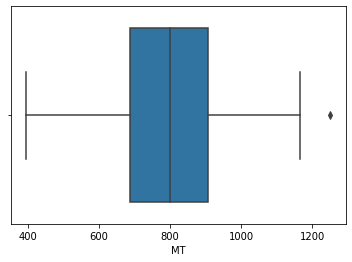

In [ ]:
sns.boxplot(data=df, x="MT")

In [ ]:
df.head()

,W,D,MT,ID,device
0,149.99480227688713,1011.8532471144274,1125,111,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...
1,136.962740068925,1221.541051772532,1165,111,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...
2,113.99708622542924,342.3296096707604,667,111,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...
3,95.04288852451556,143.84404238535387,811,111,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...
4,193.47337041705387,819.0016363431141,778,111,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...


In [ ]:
from scipy.optimize import curve_fit

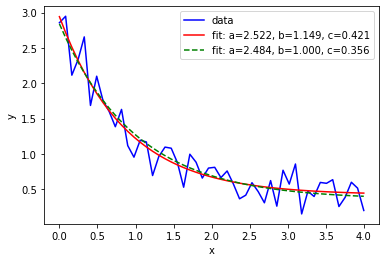

In [ ]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c
  
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')


popt, pcov = curve_fit(func, xdata, ydata)
popt
np.array([2.56274217, 1.37268521, 0.47427475])
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
popt
np.array([2.43736712, 1.        , 0.34463856])
plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()